In [102]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

# Fixed seed for reproducibility
np.random.seed(42)

# Wave noise parameters
wave_amp_z = 0.006
wave_amp_pitch = 0.0018
wave_amp_roll = 0.003
noise_scale = 0.0206
wave_frequency = 0.05  # Hz
dt = 0.1  # time step in seconds
r = 0.998  # damping factor
omega_d = 2 * math.pi * wave_frequency
a = 2 * r * math.cos(omega_d * dt)
b = -(r**2)


In [117]:
def generate_noise_series(length, a, b, amplitude, noise_scale=noise_scale):
    noise = [np.random.randn(), np.random.randn()]
    output = []
    for _ in range(length):
        e = noise_scale * np.random.randn()
        new_value = a * noise[-1] + b * noise[-2] + e
        noise.append(new_value)
        output.append(amplitude * new_value)
    return output

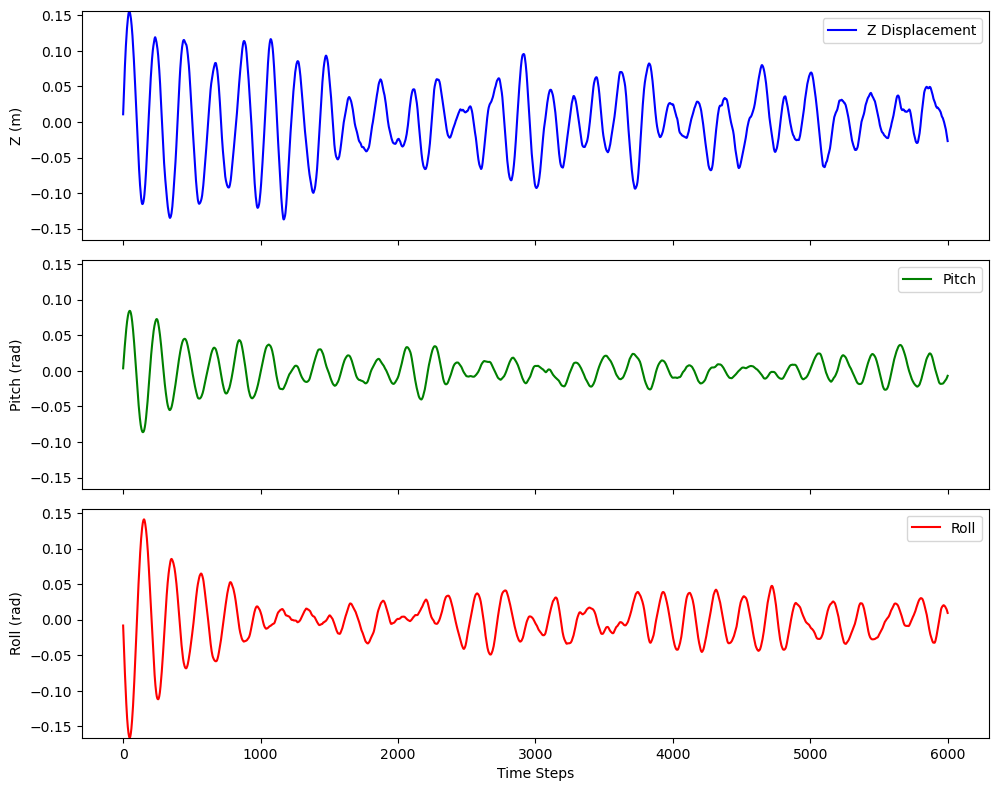

In [118]:
# Generate and plot wave noise with 2500 steps
steps = 6000
z_series = generate_noise_series(steps, a, b, wave_amp_z)
pitch_series = generate_noise_series(steps, a, b, wave_amp_pitch)
roll_series = generate_noise_series(steps, a, b, wave_amp_roll)

all_values = np.array([z_series, pitch_series, roll_series])
y_min, y_max = all_values.min(), all_values.max()

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
axs[0].plot(z_series, label='Z Displacement', color='blue')
axs[0].set_ylabel("Z (m)")
axs[0].set_ylim(y_min, y_max)
axs[0].legend()

axs[1].plot(pitch_series, label='Pitch', color='green')
axs[1].set_ylabel("Pitch (rad)")
axs[1].set_ylim(y_min, y_max)
axs[1].legend()

axs[2].plot(roll_series, label='Roll', color='red')
axs[2].set_ylabel("Roll (rad)")
axs[2].set_xlabel("Time Steps")
axs[2].set_ylim(y_min, y_max)
axs[2].legend()

plt.tight_layout()
plt.show()

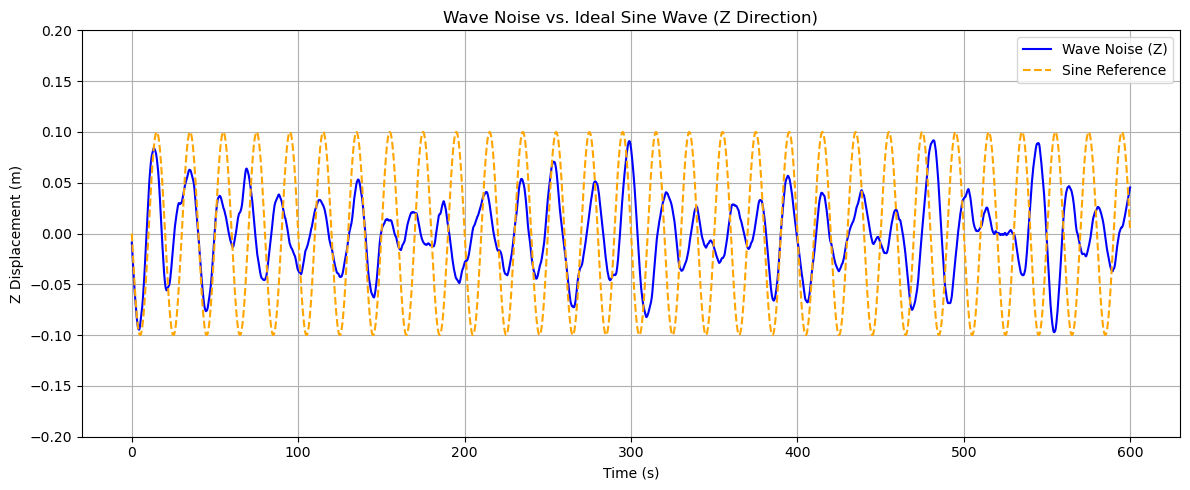

In [119]:
# Comparison with sine wave
steps = 6000
time = np.arange(steps) * dt
z_series = generate_noise_series(steps, a, b, wave_amp_z)

sine_amplitude = 0.1
sine_reference = -1 * sine_amplitude * np.sin(2 * np.pi * wave_frequency * time)

plt.figure(figsize=(12, 5))
plt.plot(time, z_series, label="Wave Noise (Z)", color="blue")
plt.plot(time, sine_reference, label="Sine Reference", color="orange", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Z Displacement (m)")
plt.title("Wave Noise vs. Ideal Sine Wave (Z Direction)")
plt.ylim(-0.2, 0.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [120]:
# Number of realizations and steps
num_realizations = 3
steps = 7000
time = np.arange(steps) * dt

# Initialize dictionary with time column
data = {"time_s": time}

# Generate and store multiple realizations
for i in range(num_realizations):
    seed_offset = 100 + i  # Just to avoid collision with other cells
    np.random.seed(seed_offset)
    data[f"z_{i+1}"] = generate_noise_series(steps, a, b, wave_amp_z)

    np.random.seed(seed_offset + 10)
    data[f"pitch_{i+1}"] = generate_noise_series(steps, a, b, wave_amp_pitch)

    np.random.seed(seed_offset + 20)
    data[f"roll_{i+1}"] = generate_noise_series(steps, a, b, wave_amp_roll)

# Convert to DataFrame and export
df = pd.DataFrame(data)
df.to_csv("exported_wave_data/wave_noise_multi_realizations.csv", index=False, float_format="%.4e")

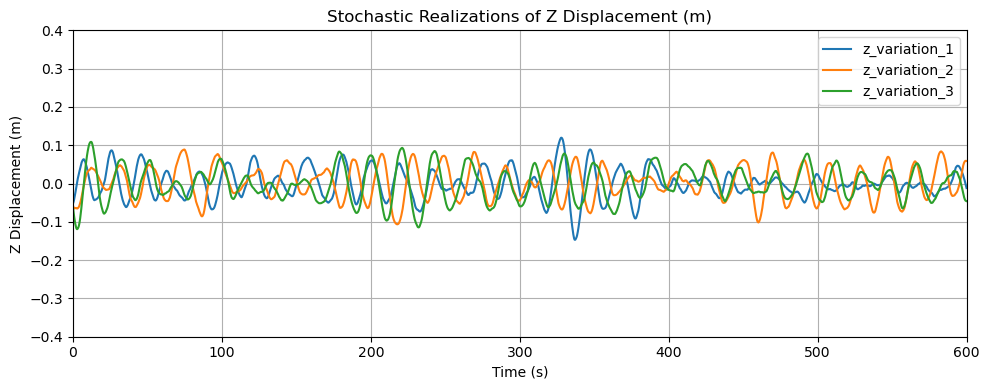

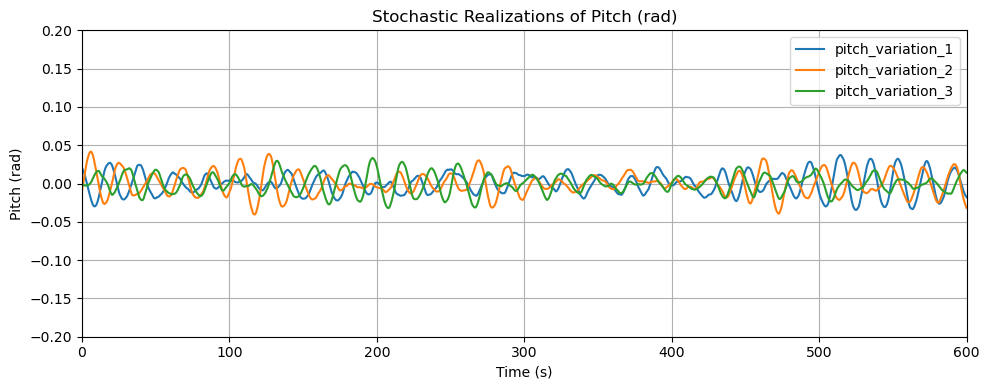

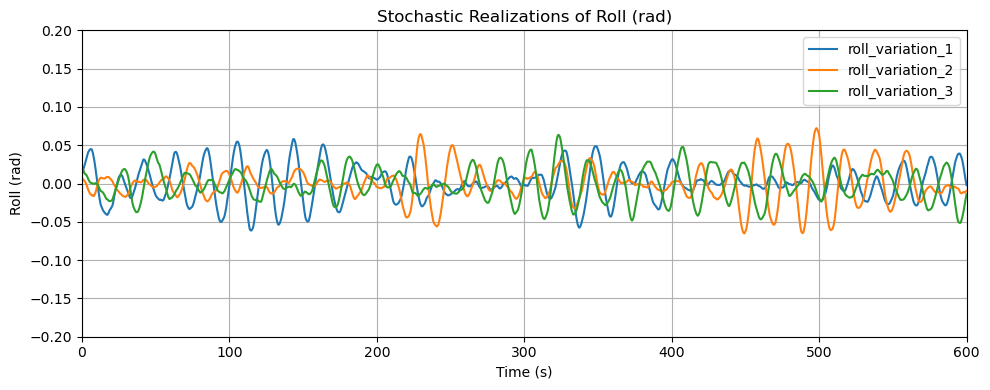

In [121]:
df = pd.read_csv("exported_wave_data/wave_noise_multi_realizations.csv")

time = df["time_s"].to_numpy() - 100

signal_groups = {
    "z": "Z Displacement (m)",
    "pitch": "Pitch (rad)",
    "roll": "Roll (rad)"
}

for base_name, title in signal_groups.items():
    plt.figure(figsize=(10, 4))
    for i in range(1, 4):
        plt.plot(time, df[f"{base_name}_{i}"].to_numpy(), label=f"{base_name}_variation_{i}")
    plt.title(f"Stochastic Realizations of {title}")
    plt.xlabel("Time (s)")
    plt.ylabel(title)
    if base_name == "z":
        plt.ylim(-0.4, 0.4)
    else:
        plt.ylim(-0.2, 0.2)
    plt.xlim(0, 600)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()